In [2]:
DEV_PATH = '/home/frossi/dev/'
import sys
if not DEV_PATH in sys.path:
    sys.path.append(DEV_PATH)

from SEEING.seeing import *
from SYMAO.propagation import *

%matplotlib inline
sp.init_printing(use_latex='mathjax')

lll = 10e-6
aa =  lll*10
propMethodsCartesian = createPropagationFormulary(True, False, False)
propMethodsPolar = createPropagationFormulary(False, False, False)

mIt = Integrator('intensity', cp, cp.float64)

1  1                                                         
⌠  ⌠                                                         
⎮  ⎮  ⎛          2             2               2⎞            
⎮  ⎮  ⎜       - z  - (-y₀ + y₁)  - (-a⋅x₀ + x₁) ⎟            
⎮  ⎮  ⎝0.1 - ℯ                                  ⎠ d(x₀) d(y₀)
⌡  ⌡                                                         
-1 -1                                                        

g(a, x₀, y₀, x₁, y₁, z)

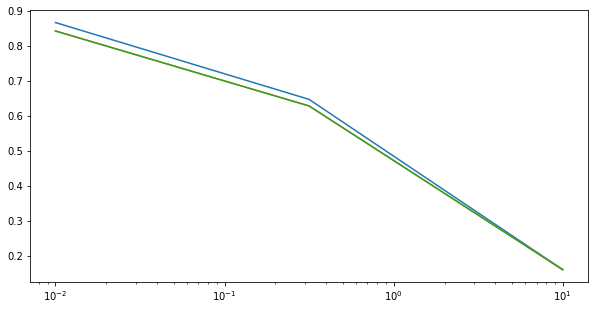

             2    
       - 4⋅x₀  - 1
0.1 - ℯ           

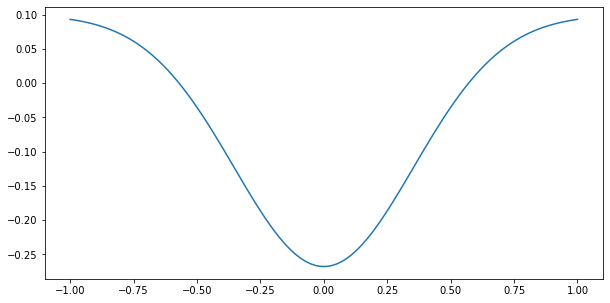

In [3]:
mIt = Integrator('intensity', cp, cp.float64)
subdiv_points = 2000
paramAndRange = ( 'z', 0.01, 10, 3, 'geometric' )
subsDictC = {'x_1': 0, 'y_1': 0, 'a':2}
va, vx0, vy0, vx1, vy1, vz = sp.symbols('a, x_0, y_0, x_1, y_1, z')
(lh, rh) = sp.Function('g')(va, vx0, vy0, vx1, vy1, vz), sp.Integral(0.1-sp.exp(-(vx1-va*vx0)**2-(vy1-vy0)**2-vz**2), (vx0, -1,1), (vy0, -1,1))
display(rh, lh)

fig, ax = plt.subplots(figsize=(10,5))
plt.xscale('log')
plt.yscale('linear')
xplot1, zplot1 = mIt.IntegralEval(lh, subsParamsByName(rh, subsDictC), [paramAndRange], [(subdiv_points, 'linear'), (subdiv_points, 'linear')], 'mc')
plt.plot(xplot1[0], zplot1)
xplot1, zplot1 = mIt.IntegralEval(lh, subsParamsByName(rh, subsDictC), [paramAndRange], [(subdiv_points, 'linear'), (subdiv_points, 'linear')], 'rect')
plt.plot(xplot1[0], zplot1)
xplot1, zplot1 = mIt.IntegralEval(lh, subsParamsByName(rh, subsDictC), [paramAndRange], [(subdiv_points, 'linear'), (subdiv_points, 'linear')], 'trap')
plt.plot(xplot1[0], zplot1)
plt.show()

subsDictC1 = {'x_1': 0, 'y_1': 0, 'a':2, 'z':1, 'y_0':0}
paramsAndRange = [( 'x_0', -1, 1, 100, 'linear' )] #, ( 'x_0', -1, 1, 100, 'linear' )
fig, ax = plt.subplots(figsize=(10,5))
plt.xscale('linear')
plt.yscale('linear')
ff = subsParamsByName(rh.function, subsDictC1)
display(ff)
xplot1, zplot1 = mIt.functionEval( ff, paramsAndRange)
plt.plot(xplot1[0], zplot1)
plt.show()

                 a  a                                                         
                 ⌠  ⌠                                                         
                 ⎮  ⎮                                                         
                 ⎮  ⎮                                                         
                 ⎮  ⎮                                                         
                 ⎮  ⎮                                                         
                 ⎮  ⎮           ⎛                  ⅈ⋅λ                       ⎞
                 ⎮  ⎮  -ⅈ⋅E₀⋅z₁⋅⎜──────────────────────────────────────── + 1⎟
                 ⎮  ⎮           ⎜       _________________________________    ⎟
                 ⎮  ⎮           ⎜      ╱   2             2             2     ⎟
                 ⎮  ⎮           ⎝2⋅π⋅╲╱  z₁  + (-x₀ + x₁)  + (-y₀ + y₁)      ⎠
E₁(x₁, y₁, z₁) = ⎮  ⎮  ───────────────────────────────────────────────────────
                 ⎮  ⎮                               

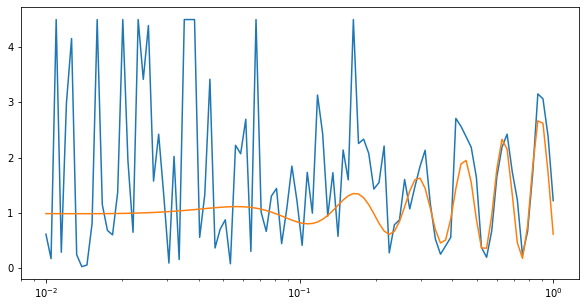

                                                                              
                                        ⎛                 2                 2 
       ⎛             5.0e-6⋅ⅈ         ⎞ ⎜ - 100000000.0⋅x₀  - 100000000.0⋅y₀  
-1.0⋅ⅈ⋅⎜1 + ──────────────────────────⎟⋅⎜─────────────────────────────────────
       ⎜         _____________________⎟ ⎜  │              2                 2 
       ⎜        ╱   2     2           ⎟ ⎝2⋅│100000000.0⋅x₀  + 100000000.0⋅y₀  
       ⎝    π⋅╲╱  x₀  + y₀  + 1.0e-10 ⎠                                       
──────────────────────────────────────────────────────────────────────────────
                                                        2     2               
                                                      x₀  + y₀  + 1.0e-10     

                           _____________________ 
        ⎞                 ╱   2     2            
+ 1    1⎟  200000.0⋅ⅈ⋅π⋅╲╱  x₀  + y₀  + 1.0e-10  
──── + ─⎟⋅ℯ                                      
   │   2⎟

                                                                              
                                  ⎛                    2      ⎞               
       ⎛          5.0e-6⋅ⅈ      ⎞ ⎜  1 - 100000000.0⋅x₀      1⎟  200000.0⋅ⅈ⋅π⋅
-1.0⋅ⅈ⋅⎜1 + ────────────────────⎟⋅⎜─────────────────────── + ─⎟⋅ℯ             
       ⎜         _______________⎟ ⎜  │              2    │   2⎟               
       ⎜        ╱   2           ⎟ ⎝2⋅│100000000.0⋅x₀  - 1│    ⎠               
       ⎝    π⋅╲╱  x₀  + 1.0e-10 ⎠                                             
──────────────────────────────────────────────────────────────────────────────
                                            2                                 
                                          x₀  + 1.0e-10                       

   _______________ 
  ╱   2            
╲╱  x₀  + 1.0e-10  
                   
                   
                   
                   
───────────────────
                   
                   

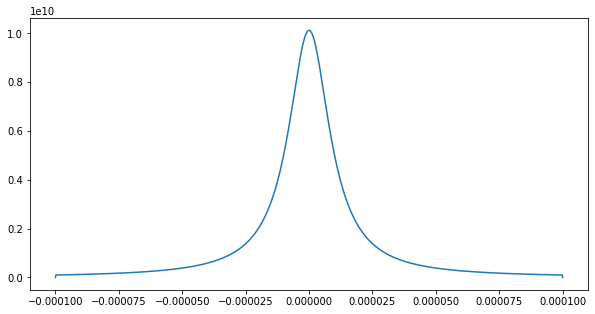

In [4]:
xyCircle = propMethodsCartesian.getFormula('xyCircle')
xyLens = propMethodsCartesian.getFormula('xyLens')
rLens = propMethodsCartesian.getFormula('rLens')

ez0_c =  subsParamsByName( xyCircle, {'a':aa} )

mIt = Integrator('intensity', cp, cp.float64)
approximations = ["Rayleigh-Sommerfeld"]
subdiv_points = 500
paramAndRange = ( 'z_1', 0.01*aa, aa, 100, 'geometric' )
subsDictC = {'E_0': ez0_c, 'x_1': 0, 'y_1': 0, 'lambda': lll, 'a':aa}
fig, ax = plt.subplots(figsize=(10,5))
plt.xscale('log')
plt.yscale('linear')
eeq = propMethodsCartesian.getFormula("Rayleigh-Sommerfeld")
display(eeq)
xplot1, zplot1 = mIt.IntegralEval(eeq.lhs, subsParamsByName(eeq.rhs, subsDictC), [paramAndRange], [(subdiv_points, 'linear'), (subdiv_points, 'linear')], 'mc')
plt.plot(xplot1[0]/aa, np.clip(zplot1, -4.5, 4.5))
xplot1, zplot1 = mIt.IntegralEval(eeq.lhs, subsParamsByName(eeq.rhs, subsDictC), [paramAndRange], [(subdiv_points, 'linear'), (subdiv_points, 'linear')], 'rect')
plt.plot(xplot1[0]/aa, np.clip(zplot1, -4.5, 4.5))
plt.show()


subsDictC1 = {'E_0': ez0_c, 'x_1': 0, 'y_1': 0, 'lambda': lll, 'a':aa, 'z_1':0.1*aa}
subsDictC2 = {'y_0':0.0}
paramsAndRange = [( 'x_0', -aa, aa, 1000, 'linear' )]
fig, ax = plt.subplots(figsize=(10,5))
plt.xscale('linear')
plt.yscale('linear')
ff = subsParamsByName(eeq.rhs.function, subsDictC1)
display(ff)
ff1 = subsParamsByName(ff, subsDictC2)
ff2 = subsParamsByName(ff1, subsDictC2)

display(ff2)
xplot1, zplot1 = mIt.functionEval( ff2, paramsAndRange)
plt.plot(xplot1[0], np.absolute(zplot1))
plt.show()

                  a 2⋅π                                                       
                  ⌠  ⌠                                                        
                  ⎮  ⎮                                                        
                  ⎮  ⎮                                                        
                  ⎮  ⎮                                                        
                  ⎮  ⎮                                                        
                  ⎮  ⎮                   ⎛                                  ⅈ⋅
                  ⎮  ⎮  -2⋅ⅈ⋅π⋅E₀ᵣ⋅r₀⋅z₁⋅⎜────────────────────────────────────
                  ⎮  ⎮                   ⎜       _____________________________
                  ⎮  ⎮                   ⎜      ╱   2                         
                  ⎮  ⎮                   ⎝2⋅π⋅╲╱  z₁  + (-r₀⋅sin(θ₀) + r₁⋅sin(
E₁ᵣ(r₁, θ₁, z₁) = ⎮  ⎮  ──────────────────────────────────────────────────────
                  ⎮  ⎮                              

                 a  a                                                         
                 ⌠  ⌠                                                         
                 ⎮  ⎮                                                         
                 ⎮  ⎮                                                         
                 ⎮  ⎮                                                         
                 ⎮  ⎮                                                         
                 ⎮  ⎮           ⎛                  ⅈ⋅λ                       ⎞
                 ⎮  ⎮  -ⅈ⋅E₀⋅z₁⋅⎜──────────────────────────────────────── + 1⎟
                 ⎮  ⎮           ⎜       _________________________________    ⎟
                 ⎮  ⎮           ⎜      ╱   2             2             2     ⎟
                 ⎮  ⎮           ⎝2⋅π⋅╲╱  z₁  + (-x₀ + x₁)  + (-y₀ + y₁)      ⎠
E₁(x₁, y₁, z₁) = ⎮  ⎮  ───────────────────────────────────────────────────────
                 ⎮  ⎮                               

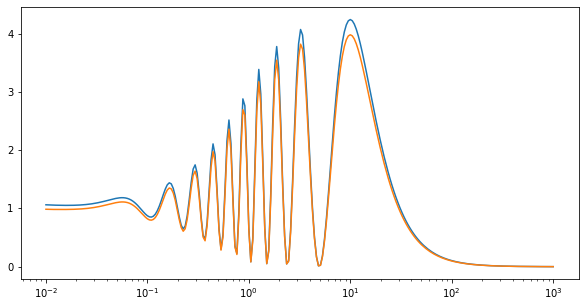

                  a 2⋅π                                                       
                  ⌠  ⌠                                                        
                  ⎮  ⎮                             ___________________________
                  ⎮  ⎮                            ╱   2                       
                  ⎮  ⎮                    2⋅ⅈ⋅π⋅╲╱  z₁  + (-r₀⋅sin(θ₀) + r₁⋅si
                  ⎮  ⎮                    ────────────────────────────────────
                  ⎮  ⎮                                                        
                  ⎮  ⎮  -2⋅ⅈ⋅π⋅E₀ᵣ⋅r₀⋅z₁⋅ℯ                                    
E₁ᵣ(r₁, θ₁, z₁) = ⎮  ⎮  ──────────────────────────────────────────────────────
                  ⎮  ⎮                 ⎛  2                             2     
                  ⎮  ⎮               λ⋅⎝z₁  + (-r₀⋅sin(θ₀) + r₁⋅sin(θ₁))  + (-
                  ⌡  ⌡                                                        
                  0  0                              

                 a  a                                                         
                 ⌠  ⌠                                                         
                 ⎮  ⎮                     _________________________________   
                 ⎮  ⎮                    ╱   2             2             2    
                 ⎮  ⎮            2⋅ⅈ⋅π⋅╲╱  z₁  + (-x₀ + x₁)  + (-y₀ + y₁)     
                 ⎮  ⎮            ──────────────────────────────────────────   
                 ⎮  ⎮                                λ                        
                 ⎮  ⎮  -ⅈ⋅E₀⋅z₁⋅ℯ                                             
E₁(x₁, y₁, z₁) = ⎮  ⎮  ───────────────────────────────────────────────────── d
                 ⎮  ⎮             ⎛  2             2             2⎞           
                 ⎮  ⎮           λ⋅⎝z₁  + (-x₀ + x₁)  + (-y₀ + y₁) ⎠           
                 ⌡  ⌡                                                         
                 -a -a                              

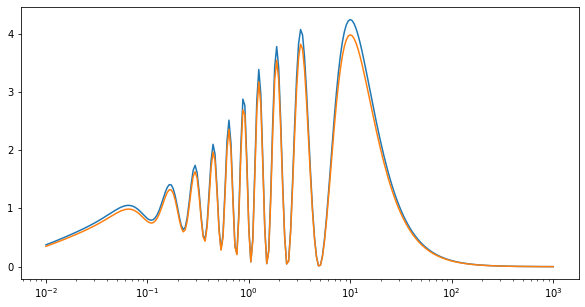

                  a 2⋅π                                                       
                  ⌠  ⌠                                                        
                  ⎮  ⎮                                 2        2             
                  ⎮  ⎮                 2⋅ⅈ⋅π⋅z₁  ⅈ⋅π⋅r₀   ⅈ⋅π⋅r₁              
                  ⎮  ⎮                 ────────  ───────  ───────             
                  ⎮  ⎮                    λ        λ⋅z₁     λ⋅z₁         ⎛   2
                  ⎮  ⎮  -2⋅ⅈ⋅π⋅E₀ᵣ⋅r₀⋅ℯ        ⋅ℯ       ⋅ℯ       ⋅besselj⎜0, ─
                  ⎮  ⎮                                                   ⎝    
E₁ᵣ(r₁, θ₁, z₁) = ⎮  ⎮  ──────────────────────────────────────────────────────
                  ⎮  ⎮                                λ⋅z₁                    
                  ⌡  ⌡                                                        
                  0  0                                                        

                      
                      
     

                 a  a                                                         
                 ⌠  ⌠                                                         
                 ⎮  ⎮                       ⎛          2             2⎞       
                 ⎮  ⎮         2⋅ⅈ⋅π⋅z₁  ⅈ⋅π⋅⎝(-x₀ + x₁)  + (-y₀ + y₁) ⎠       
                 ⎮  ⎮         ────────  ───────────────────────────────       
                 ⎮  ⎮            λ                    λ⋅z₁                    
                 ⎮  ⎮  -ⅈ⋅E₀⋅ℯ        ⋅ℯ                                      
E₁(x₁, y₁, z₁) = ⎮  ⎮  ───────────────────────────────────────────────── d(x₀)
                 ⎮  ⎮                         λ⋅z₁                            
                 ⌡  ⌡                                                         
                 -a -a                                                        

      
      
      
      
      
      
      
 d(y₀)
      
      
      

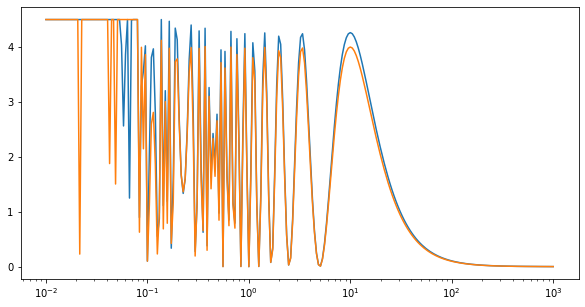

                  a 2⋅π                                                       
                  ⌠  ⌠                                                        
                  ⎮  ⎮                                 2                      
                  ⎮  ⎮                 2⋅ⅈ⋅π⋅z₁  ⅈ⋅π⋅r₀                       
                  ⎮  ⎮                 ────────  ───────                      
                  ⎮  ⎮                    λ        λ⋅z₁         ⎛   2⋅π⋅r₀⋅r₁⎞
                  ⎮  ⎮  -2⋅ⅈ⋅π⋅E₀ᵣ⋅r₀⋅ℯ        ⋅ℯ       ⋅besselj⎜0, ─────────⎟
                  ⎮  ⎮                                          ⎝      λ⋅z₁  ⎠
E₁ᵣ(r₁, θ₁, z₁) = ⎮  ⎮  ──────────────────────────────────────────────────────
                  ⎮  ⎮                            λ⋅z₁                        
                  ⌡  ⌡                                                        
                  0  0                                                        

             
             
             
         

                 a  a                                                         
                 ⌠  ⌠                                                         
                 ⎮  ⎮                       ⎛  2     2⎞                       
                 ⎮  ⎮         2⋅ⅈ⋅π⋅z₁  ⅈ⋅π⋅⎝x₀  + y₀ ⎠  2⋅ⅈ⋅π⋅(x₀⋅x₁ + y₀⋅y₁)
                 ⎮  ⎮         ────────  ───────────────  ─────────────────────
                 ⎮  ⎮            λ            λ⋅z₁                λ⋅z₁        
                 ⎮  ⎮  -ⅈ⋅E₀⋅ℯ        ⋅ℯ               ⋅ℯ                     
E₁(x₁, y₁, z₁) = ⎮  ⎮  ───────────────────────────────────────────────────────
                 ⎮  ⎮                            λ⋅z₁                         
                 ⌡  ⌡                                                         
                 -a -a                                                        

             
             
             
             
             
             
             
─ d(x₀) d(y₀)
             
    

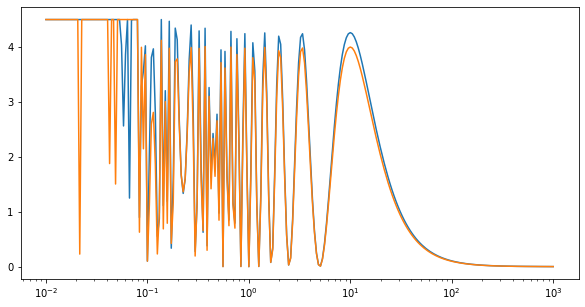

In [6]:
# "From symbolic function definition to universal funcion computation in Python"
# "Target independent simulation development in Python"

approximations = ["Rayleigh-Sommerfeld", "Approximate Rayleigh-Sommerfeld", "Near Fresnel", "Far Fresnel"]
subdiv_points = 512/2
paramAndRange = ( 'z_1', 0.01*aa, 1000*aa, subdiv_points, 'geometric' )
ez0_c =  subsParamsByName( xyCircle, {'a':aa} )
ez0_p = 1      
subsDictC = {'E_0': ez0_c, 'x_1': 0, 'y_1': 0, 'lambda': lll, 'a':aa}
subsDictP = {'E_0r': ez0_p, 'theta_1': np.pi/4,  'r_1': 0, 'lambda': lll, 'a':aa}

for m in approximations:
    fig, ax = plt.subplots(figsize=(10,5))
    plt.xscale('log')
    plt.yscale('linear')
    for ff, sDict in zip([propMethodsPolar, propMethodsCartesian], [subsDictP, subsDictC] ):
        eeq = ff.getFormula(m)
        display(eeq)
        if sDict==subsDictP:
            xplot1, zplot1 = mIt.IntegralEval(eeq.lhs, subsParamsByName(eeq.rhs, sDict), [paramAndRange], [(subdiv_points, 'sqrt'), (subdiv_points, 'linear')], 'rect')
            zplot1 /= (2*np.pi) ** 2 * 64
        else:
            xplot1, zplot1 = mIt.IntegralEval(eeq.lhs, subsParamsByName(eeq.rhs, sDict), [paramAndRange], [(subdiv_points, 'linear'), (subdiv_points, 'linear')], 'rect')
        plt.plot(xplot1[0]/aa, np.clip(zplot1, 0, 4.5))
    plt.show()

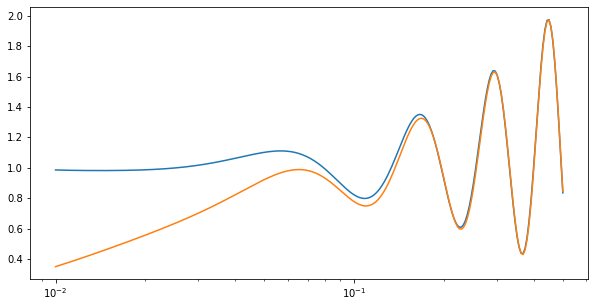

In [8]:
approximations = ["Rayleigh-Sommerfeld", "Approximate Rayleigh-Sommerfeld"] # "Far Fresnel"]
subdiv_points = 256
paramAndRange = ('z_1', 0.01*aa, 0.5*aa, subdiv_points, 'geometric')
ez0_l =  subsParamsByName( xyCircle, {'a':aa} )
subsDict = {'E_0': ez0_l, 'x_1': 0, 'y_1': 0,  'lambda': lll, 'a':aa}
fig, ax = plt.subplots(figsize=(10,5))
plt.xscale('log')
plt.yscale('linear')

for m in approximations:
    eeq = propMethodsCartesian.getFormula(m)
    xplot1, zplot1 = mIt.IntegralEval(eeq.lhs, subsParamsByName(eeq.rhs, subsDict), [paramAndRange])
    plt.plot(xplot1[0]/aa, np.clip(zplot1, 0, 4.5))
plt.show()

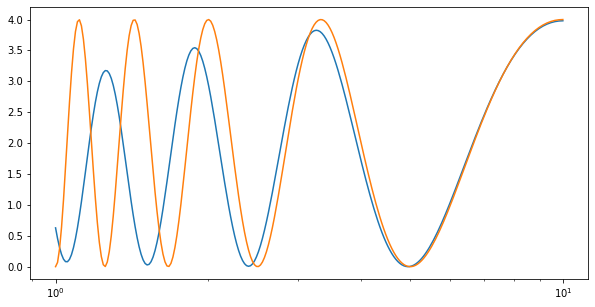

In [9]:
approximations = ["Rayleigh-Sommerfeld", "Far Fresnel"]
subdiv_points = 256
paramAndRange = ('z_1', aa, 10*aa, subdiv_points, 'geometric')
ez0_l =  subsParamsByName( xyCircle, {'a':aa} )
subsDict = {'E_0': ez0_l, 'x_1': 0, 'y_1': 0,  'lambda': lll, 'a':aa}

fig, ax = plt.subplots(figsize=(10,5))
plt.xscale('log')
plt.yscale('linear')
for m in approximations:
    eeq = propMethodsCartesian.getFormula(m)
    xplot1, zplot1 = mIt.IntegralEval(eeq.lhs, subsParamsByName(eeq.rhs, subsDict), [paramAndRange])
    plt.plot(xplot1[0]/aa, np.clip(zplot1, 0, 4.5))
plt.show()

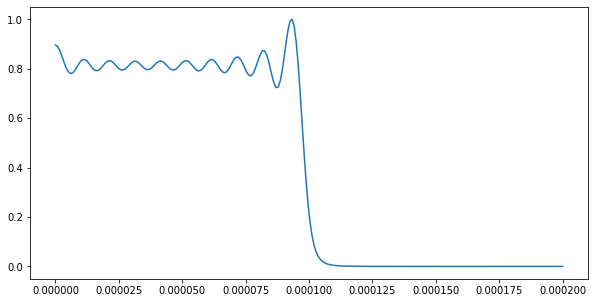

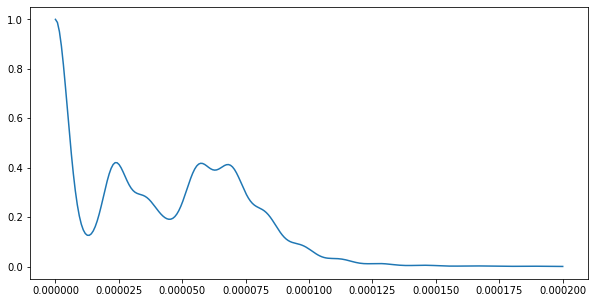

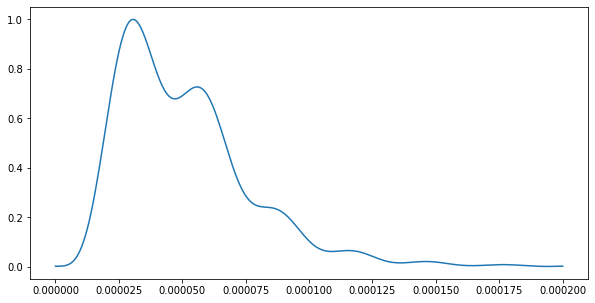

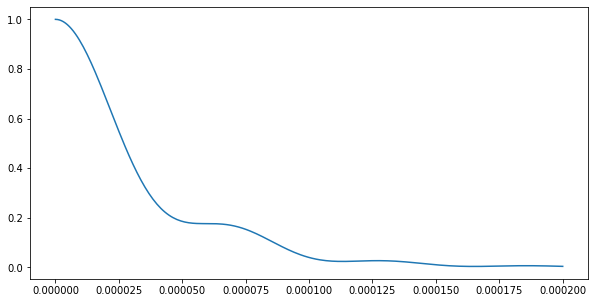

In [11]:
#m = "Rayleigh-Sommerfeld"
approximations1 = ["Rayleigh-Sommerfeld"]#, "Near Fresnel" ]#, "Fraunhofer"] 

subdiv_points = 512/2
distances = [10.0*aa, 4.9*aa, 1.86*aa, 0.05*aa]
distances = list(reversed(distances))
paramAndRange1 = ('r_1', 0.0, 200e-6, subdiv_points, 'linear')
paramAndRange2 = ('x_1', 0.0, 200e-6, subdiv_points, 'linear')
ez0_c =  subsParamsByName( xyCircle, {'a':aa} )
ez0_p = 1 #rCircle(r0, aa)
subsDictC = {'E_0': ez0_c, 'y_1': 0,  'lambda': lll, 'a':aa}
subsDictP = {'E_0r': ez0_p, 'theta_1': 0,  'lambda': lll, 'a':aa}

for distance in distances:
    fig, ax = plt.subplots(figsize=(10,5))
    plt.yscale('linear')    
    for m in approximations1:
#        for ff, sDict, pr in zip([propMethodsPolar, propMethodsCartesian], [subsDictP, subsDictC], [paramAndRange1, paramAndRange2] ):
        for ff, sDict, pr in zip([propMethodsCartesian], [subsDictC], [paramAndRange2] ):
            eeq = ff.getFormula(m)
            sDict['z_1'] = distance 
            rh = subsParamsByName(eeq.rhs, sDict)
            if sDict==subsDictP:
                xplot1, fplot1 = mIt.IntegralEval(eeq.lhs, rh, [pr], [(1024, 'sqrt'), (1024, 'linear')])
                fplot1 /= (2*np.pi)**2
            else:
                xplot1, fplot1 = mIt.IntegralEval(eeq.lhs, rh, [pr])
            fplot1 /= np.max(fplot1)
            ax.plot(xplot1[0], fplot1)        
    plt.show()

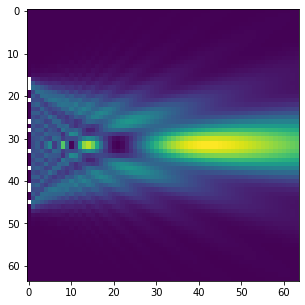

In [12]:
subdiv_points = 128/2
paramsAndRanges = [ ('x_1', -200e-6, 200e-6, subdiv_points, 'linear'), ('z_1',  0, 15*aa, subdiv_points, 'linear')]
ez0_l =  subsParamsByName( xyCircle, {'a':aa} )
subsDict = {'E_0': ez0_l, 'y_1': 0, 'lambda': lll, 'a':aa}

fig, ax = plt.subplots(figsize=(10,5))
eeq = propMethodsCartesian.getFormula("Rayleigh-Sommerfeld")
xplot, fplot1 = mIt.IntegralEval(eeq.lhs, subsParamsByName(eeq.rhs, subsDict), paramsAndRanges) 
ax.imshow( fplot1 )
plt.show()

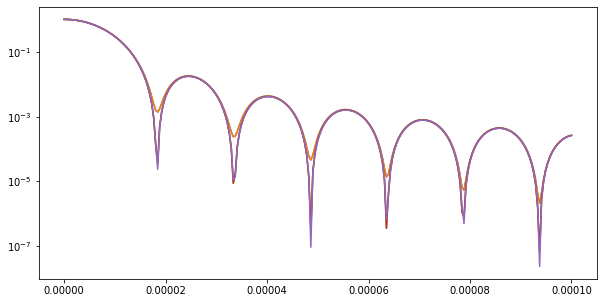

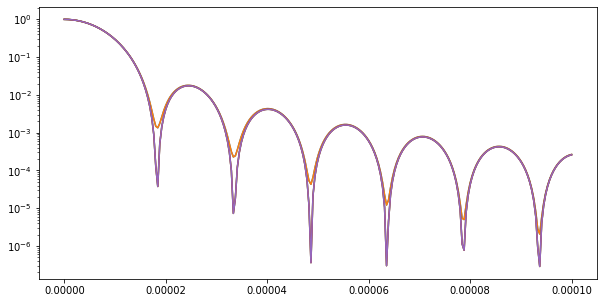

In [17]:
lll = 500e-9
aa =  0.05
FN = 30
dd = 2*aa
focal_dist = dd*FN

approximations1 = ["Rayleigh-Sommerfeld", "Approximate Rayleigh-Sommerfeld", "Near Fresnel", "Far Fresnel", "Fraunhofer"]
distances = [focal_dist]

subdiv_points = 512/2
paramAndRange1 = ('r_1', 0.0, 100e-6, subdiv_points, 'linear')
paramAndRange2 = ('x_1', 0.0, 100e-6, subdiv_points, 'linear')
ez0_c =  subsParamsByName( xyCircle, {'a':aa} )
ez0_p = 1
ez0_cl =  subsParamsByName( xyCircle * xyLens, {'a':aa, 'lambda':lll, 'FN':FN} )
ez0_pl =  subsParamsByName( rLens, {'a':aa, 'lambda':lll, 'FN':FN} )
subsDictC = {'E_0': ez0_cl, 'y_1': 0,  'lambda': lll, 'a':aa}
subsDictP = {'E_0r': ez0_pl, 'theta_1': 0,  'lambda': lll, 'a':aa}

for distance in distances:
    for ff, sDict, pr in zip([propMethodsPolar, propMethodsCartesian], [subsDictP, subsDictC], [paramAndRange1, paramAndRange2] ):
        fig, ax = plt.subplots(figsize=(10,5))
        plt.yscale('log')
        for m in approximations1:
            eeq = ff.getFormula(m)
            sDict['z_1'] = distance 
            if (m=="Fraunhofer"):
                if 'E_0' in sDict.keys():
                    sDict['E_0'] = ez0_c
                if 'E_0r' in sDict.keys():
                    sDict['E_0r'] = ez0_p
            else:
                if 'E_0' in sDict.keys():
                    sDict['E_0'] = ez0_cl
                if 'E_0r' in sDict.keys():
                    sDict['E_0r'] = ez0_pl
            rh = subsParamsByName(eeq.rhs, sDict)
            if sDict==subsDictP:
                xplot1, fplot1 = mIt.IntegralEval(eeq.lhs, rh, [pr], [(subdiv_points, 'sqrt'), (subdiv_points, 'linear')])
                fplot1 /= (2*np.pi)**2
            else:
                xplot1, fplot1 = mIt.IntegralEval(eeq.lhs, rh, [pr])
                        
            fplot1 /= np.max(fplot1)
            ax.plot(xplot1[0], fplot1)        
        plt.show()

In [20]:
def polar_to_cart(polar_data, theta_step, range_step, x, y, order=3):
    from scipy.ndimage.interpolation import map_coordinates as mp
    X, Y = np.meshgrid(x, y)
    Tc = np.degrees(np.arctan2(Y, X)).ravel()
    Rc = (np.sqrt(X**2 + Y**2)).ravel()
    Tc[Tc < 0.0] = 360.0 + Tc[Tc < 0.0]
    Tc = Tc / theta_step
    Rc = Rc / range_step
    coords = np.vstack((Tc, Rc))
    polar_data = np.vstack((polar_data, polar_data[-1, :]))
    cart_data = mp(
        polar_data,
        coords,
        order=order,
        mode='constant',
        cval=np.nan)
    return(cart_data.reshape(len(y), len(x)).T)


lll = 500e-9
aa =  0.05
FN = 30
dd = 2*aa
focal_dist = dd*FN

#approximations1 = ["Rayleigh-Sommerfeld", "Approximate Rayleigh-Sommerfeld", "Near Fresnel", "Far Fresnel" ] #, "Fraunhofer"]
#approximations1 = ["Rayleigh-Sommerfeld", "Near Fresnel" ] #, "Fraunhofer"]
approximations1 = ["Fraunhofer"] # ""Near Fresnel" ] #, "Fraunhofer"]

distances = [focal_dist+lll] #, focal_dist*0.95, focal_dist*1.05]

subdiv_points = 256/4
paramAndRange1 = [('r_1', 0.0, 100e-6, subdiv_points, 'linear'), ('theta_1', 0.0, 2*np.pi, subdiv_points, 'linear')]
paramAndRange2 = [('x_1', -100e-6, 100e-6, subdiv_points, 'linear'), ('y_1', -100e-6, 100e-6, subdiv_points, 'linear')]

ez0_c =  subsParamsByName( xyCircle, {'a':aa} )
ez0_p = 1
ez0_cl =  subsParamsByName( xyCircle * xyLens, {'a':aa, 'lambda':lll, 'FN':FN} )
ez0_pl =  subsParamsByName( rLens, {'a':aa, 'lambda':lll, 'FN':FN} )

# dictionary for Fraunhofer method, at the focal plane of a lens
subsDictP = {'E_0': ez0_p, 'lambda': lll, 'a':aa}
subsDictC = {'E_0': ez0_c, 'lambda': lll, 'a':aa}
# dictionary for methods pther than Fraunhofer
#subsDictP = {ez0r: ez0_pl, ll: lll, a:aa}
#subsDictC = {ez0: ez0_cl, ll: lll, a:aa}

for distance in distances:
    for m in approximations1:
        for ff, sDict, pr in zip([propMethodsPolar, propMethodsCartesian], [subsDictP, subsDictC], [paramAndRange1, paramAndRange2] ):
            eeq = ff.getFormula(m)
            sDict['z_1'] = distance 
            rh = subsParamsByName(eeq.rhs, sDict)
            display(rh)
            if sDict==subsDictP:                
                display(rh.doit())
                xxx, fplot1 = mIt.IntegralEval(eeq.lhs, rh, pr, [(subdiv_points, 'sqrt'), (subdiv_points, 'linear')])
                fplot1 /= (2*np.pi)**2
                fplot1 = polar_to_cart(np.flip(fplot1.T, axis=0), 360.0/subdiv_points, 100e-6/subdiv_points, np.linspace(-100e-6, 100e-6, subdiv_points), np.linspace(-100e-6, 100e-6, subdiv_points))
            else:
                xxx, fplot1 = mIt.IntegralEval(eeq.lhs, rh, pr, [(subdiv_points, 'linear'), (subdiv_points, 'linear')])
                
            fig, ax = plt.subplots(figsize=(12, 12))
            ax.imshow( np.log(fplot1), interpolation='nearest', cmap='jet')
            plt.show()


0.05 2⋅π                                                                      
 ⌠    ⌠                                                                       
 ⎮    ⎮             2         -1333333.11111115⋅ⅈ⋅π⋅r₀⋅r₁⋅cos(θ₀ - θ₁)        
 ⎮    ⎮  8000000.0⋅π ⋅E₀ᵣ⋅r₀⋅ℯ                                         d(θ₀) d
 ⌡    ⌡                                                                       
 0    0                                                                       

    
    
    
(r₀)
    
    

                 0.05                                                         
                  ⌠                                                           
                  ⎮      2⋅π                                                  
                  ⎮       ⌠                                                   
           2      ⎮       ⎮   -1333333.11111115⋅ⅈ⋅π⋅r₀⋅r₁⋅cos(θ₀ - θ₁)        
8000000.0⋅π ⋅E₀ᵣ⋅ ⎮   r₀⋅ ⎮  ℯ                                         d(θ₀) d
                  ⎮       ⌡                                                   
                  ⎮       0                                                   
                  ⌡                                                           
                  0                                                           

    
    
    
    
    
(r₀)
    
    
    
    

TypeError: Unsupported type <class 'sympy.core.mul.Mul'>

In [ ]:
from zernike import *

NN = 16
zf = createZernikeFormulary(NN)
grid_size=1024
rr, th = getZernikeDomain(grid_size)


lh, rh, ee = propMethodsPolar.getFormula("Fraunhofer")

display(ee)

for i in range(NN-1):
    idx = noll_to_zern(i+2)
    zname = 'Z' + str(idx[0]) + str(idx[1])
    _, ffz, _ = zf.getFormula(zname)
    ffz = ffz.subs(rho,r0).subs(theta, theta0)
#    display(ffz)   
    lh, rh, ee = propMethodsPolar.getFormula("Fraunhofer")
#    rh = rh.subs(ez0r, sp.exp(-I*2*sp.S.Pi*ffz/ll) )

    rh = rh.subs(ez0r, ffz )

#    display(rh)
    display(rh.doit())

#zf.displayAll()


#    _, _, z_1 = zf.evaluateFormula(zname, {}, ['rho', 'theta'], [rr, th], 'scipy')    
